In [1]:
# Bibliotecas utilizadas
import numpy as np
import pyodbc # Conector do SQL Server
import pandas as pd
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')

import seaborn as sns
sns.set_theme(context = 'paper', style = 'darkgrid', palette = 'pastel')

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('C:/DataScience/portfolio_projects/python/IPOG/Mod06/data/dados-delivery.csv')

In [3]:
df_copia = df.copy()


1. Quais são os produtos mais pedidos?
2. Qual é o tempo médio de atraso para cada produto cuja entrega atrasa?
3. Qual a taxa média de atraso nas entregas (percentual de aumento em relação ao previsto)?
4. Quais produtos mais atrasam?
5. Quais dias da semana mais têm pedidos? Há correlação com atrasos?
6. Quais variáveis possuem correlação?
7. A maior parte dos pedidos são feitos em qual horário?
8. Quais campos possuem valores ausentes? Como preenchê-los?
9. As avaliações dos pedidos podem ser explicadas pela variável atraso?

In [4]:
df.head(5)

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao
0,A,4.0,14.0,15.0,15.0,12/24/2020,39.0,0.0,10.0
1,A,7.0,13.0,15.0,60.0,12/16/2020,10.0,1.0,0.0
2,B,7.0,14.0,30.0,30.0,12/27/2020,30.0,0.0,9.0
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0
4,B,6.0,13.0,60.0,75.0,12/18/2020,23.0,1.0,1.0


In [5]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao']

In [6]:
df.describe()

,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,valor,atraso,avaliacao
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,3.977358,15.049057,87.113208,87.377358,22.318868,0.484906,5.750943
std,2.075024,5.285556,51.656551,49.611049,20.016964,0.500244,3.568165
min,1.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
25%,2.000000,12.000000,40.000000,45.000000,8.000000,0.000000,2.000000
50%,4.000000,14.000000,85.000000,80.000000,16.000000,0.000000,8.000000
75%,6.000000,20.000000,130.000000,130.000000,31.000000,1.000000,9.000000
max,7.000000,23.000000,180.000000,180.000000,97.000000,1.000000,10.000000


In [7]:
df.dtypes

Produto                object
dia-da-semana         float64
hora-do-pedido        float64
tempo-entrega         float64
tempo-entrega-real    float64
data-pedido            object
valor                 float64
atraso                float64
avaliacao             float64
dtype: object

In [8]:
df.isna().sum()

Produto               1
dia-da-semana         2
hora-do-pedido        2
tempo-entrega         2
tempo-entrega-real    2
data-pedido           2
valor                 2
atraso                2
avaliacao             2
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao
0,A,4.0,14.0,15.0,15.0,12/24/2020,39.0,0.0,10.0
1,A,7.0,13.0,15.0,60.0,12/16/2020,10.0,1.0,0.0
2,B,7.0,14.0,30.0,30.0,12/27/2020,30.0,0.0,9.0
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0
4,B,6.0,13.0,60.0,75.0,12/18/2020,23.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
525,G,5.0,21.0,50.0,130.0,12/23/2020,25.0,1.0,0.0
526,B,2.0,7.0,165.0,160.0,12/24/2020,97.0,0.0,8.0
527,F,1.0,5.0,35.0,60.0,12/8/2020,22.0,1.0,3.0
528,H,6.0,14.0,90.0,110.0,12/23/2020,72.0,1.0,0.0


In [11]:
df.isna().sum()

Produto               0
dia-da-semana         0
hora-do-pedido        0
tempo-entrega         0
tempo-entrega-real    0
data-pedido           0
valor                 0
atraso                0
avaliacao             0
dtype: int64

In [12]:
df['Produto'].value_counts()

D    80
B    73
A    65
G    59
C    57
F    57
H    52
I    45
E    40
X     1
V     1
Name: Produto, dtype: int64

# EDA

In [13]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao']

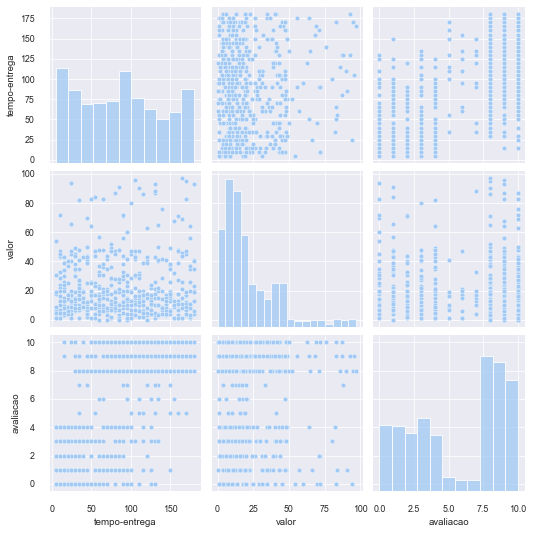

In [14]:
sns.pairplot(df[['tempo-entrega','valor','avaliacao']])

<AxesSubplot:title={'center':'Produtos Mais Pedidos no Período'}>

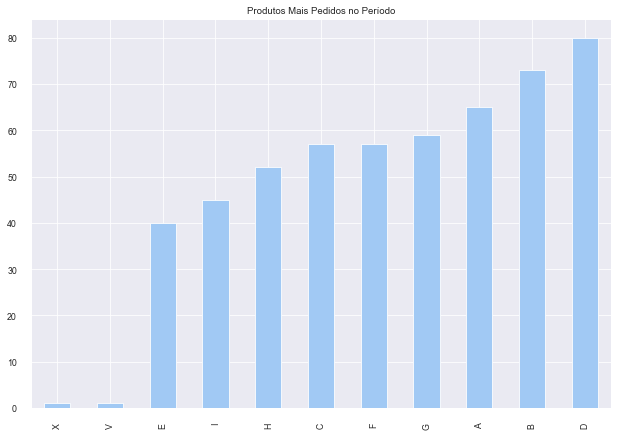

In [15]:
# 1. Quais são os produtos mais pedidos?
df['Produto'].value_counts().sort_values(ascending = True).plot(kind = "bar", title = "Produtos Mais Pedidos no Período")

<AxesSubplot:xlabel='Produto'>

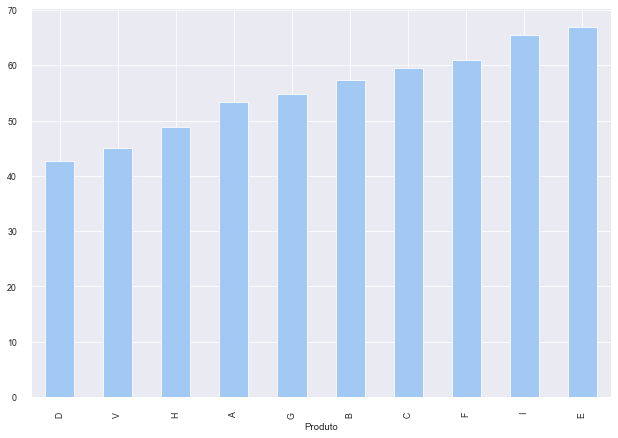

In [16]:
# 2. Qual é o tempo médio de atraso para cada produto cuja entrega atrasa?
df_atraso = df.loc[df['atraso'] == 1]
df_atraso['tempo-entrega'].groupby(df_atraso['Produto']).mean().sort_values(ascending = True).plot(kind = "bar")


In [17]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao']

In [18]:
# 3. Qual a taxa média de atraso nas entregas (percentual de aumento em relação ao previsto)?
df['taxa_tempo_entrega'] = (((df['tempo-entrega-real'] - df['tempo-entrega']) / df['tempo-entrega'])*100).round(2)
df[['Produto','tempo-entrega','tempo-entrega-real','taxa_tempo_entrega']]

,Produto,tempo-entrega,tempo-entrega-real,taxa_tempo_entrega
0,A,15.0,15.0,0.00
1,A,15.0,60.0,300.00
2,B,30.0,30.0,0.00
3,A,45.0,15.0,-66.67
4,B,60.0,75.0,25.00
...,...,...,...,...
525,G,50.0,130.0,160.00
526,B,165.0,160.0,-3.03
527,F,35.0,60.0,71.43
528,H,90.0,110.0,22.22


In [19]:
df[['tempo-entrega','tempo-entrega-real','taxa_tempo_entrega']].groupby(df['Produto']).mean().round(2)

,tempo-entrega,tempo-entrega-real,taxa_tempo_entrega
Produto,,,
A,78.08,90.38,103.67
B,84.11,84.52,131.32
C,87.81,82.02,71.08
D,84.00,85.88,131.08
E,91.88,86.25,102.22
F,91.32,88.07,81.75
G,90.08,86.78,77.96
H,83.85,92.02,129.32
I,102.22,93.89,111.00


<AxesSubplot:xlabel='Produto'>

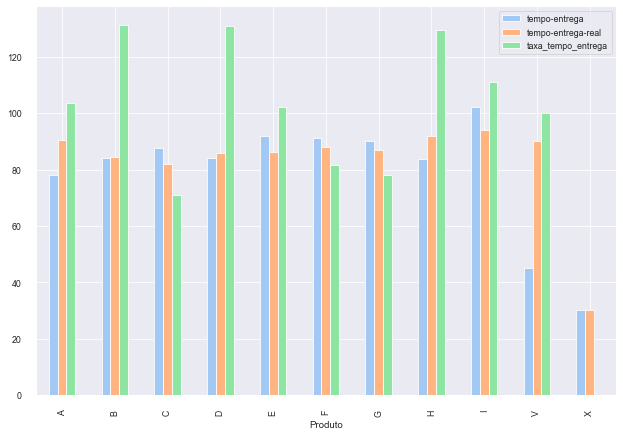

In [20]:
df[['tempo-entrega','tempo-entrega-real','taxa_tempo_entrega']].groupby(
    df['Produto']).mean().round(2).plot.bar(
    xlabel = 'Produto')

<AxesSubplot:xlabel='[Produtos]', ylabel='Tempo Médio de Entega'>

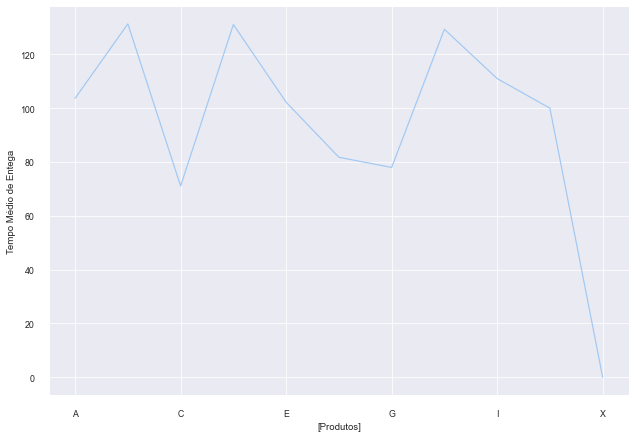

In [21]:
df['taxa_tempo_entrega'].groupby(df['Produto']).mean().plot(kind = "line", xlabel = ['Produtos'], ylabel = 'Tempo Médio de Entega')


<AxesSubplot:title={'center':'Produtos que Mais Sofreram Atrasos'}, ylabel='Produto'>

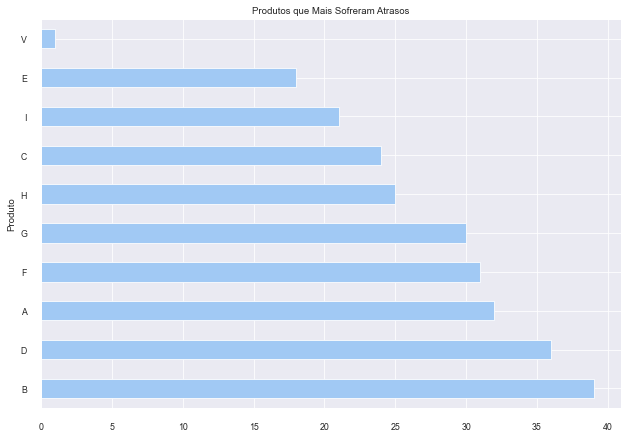

In [22]:
# 4. Quais produtos mais atrasam?
plot_x1 = df['atraso'].loc[df['atraso'] == 1.0 ].groupby(
    df['Produto']).count().sort_values(
    ascending = False).plot(
    kind = "barh", title = "Produtos que Mais Sofreram Atrasos")
plot_x1

In [23]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao',
 'taxa_tempo_entrega']

Object `atrasos` not found.


<AxesSubplot:xlabel='Dias da Semana'>

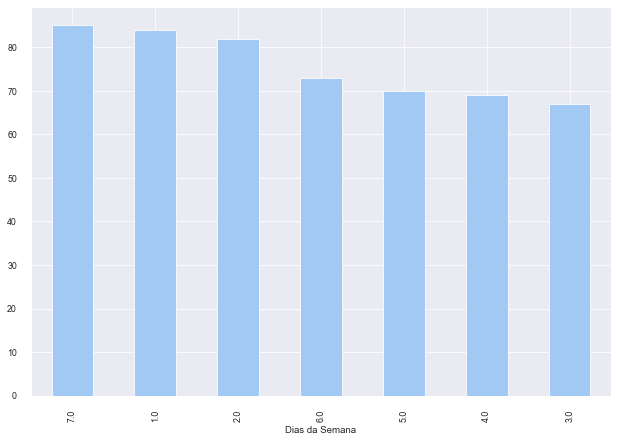

In [24]:
5. Quais dias da semana mais têm pedidos? Há correlação com atrasos?
df['dia-da-semana'].value_counts().sort_values(ascending = False).plot(kind = 'bar', xlabel = 'Dias da Semana', y = 'Qtd Pedidos')

In [25]:
6. Quais variáveis possuem correlação?
df.corr()

Object `correlação` not found.


,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,valor,atraso,avaliacao,taxa_tempo_entrega
dia-da-semana,1.000000,-0.015583,-0.080589,0.056255,0.026389,0.139897,-0.103655,0.044737
hora-do-pedido,-0.015583,1.000000,0.001039,0.062525,-0.321936,0.051042,-0.024409,0.058762
tempo-entrega,-0.080589,0.001039,1.000000,0.041335,0.030792,-0.592772,0.598883,-0.554419
tempo-entrega-real,0.056255,0.062525,0.041335,1.000000,-0.007085,0.532734,-0.480397,0.317941
valor,0.026389,-0.321936,0.030792,-0.007085,1.000000,-0.053227,0.032980,-0.061627
atraso,0.139897,0.051042,-0.592772,0.532734,-0.053227,1.000000,-0.921367,0.485493
avaliacao,-0.103655,-0.024409,0.598883,-0.480397,0.032980,-0.921367,1.000000,-0.493397
taxa_tempo_entrega,0.044737,0.058762,-0.554419,0.317941,-0.061627,0.485493,-0.493397,1.000000


<AxesSubplot:>

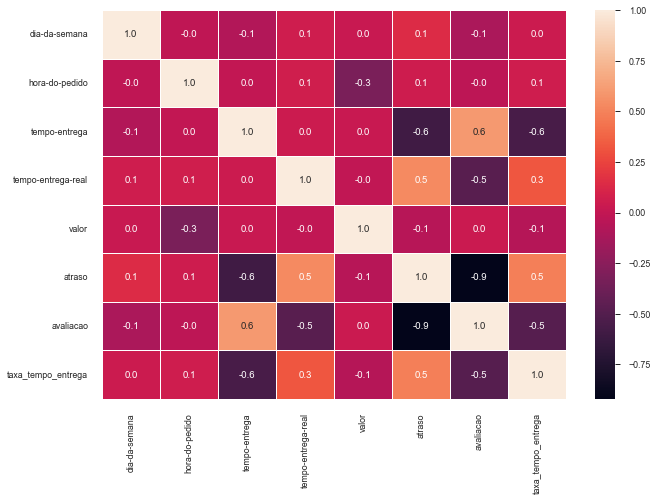

In [26]:
sns.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

In [27]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao',
 'taxa_tempo_entrega']

Object `horário` not found.


<AxesSubplot:title={'center':'Qtd Pedidos por Horário'}, xlabel='Hora de Entrega', ylabel='Qtd de Pedidos'>

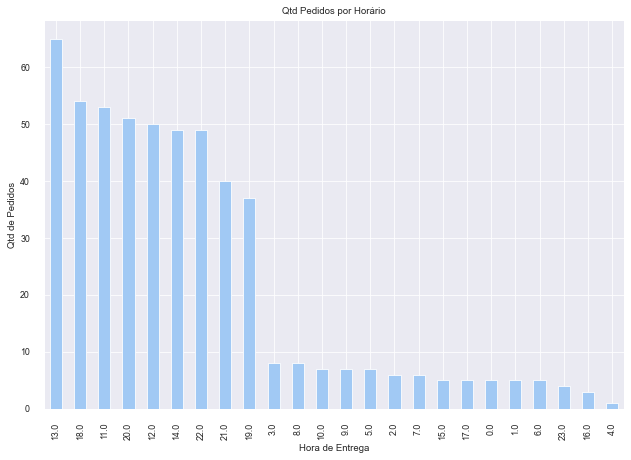

In [28]:
7. A maior parte dos pedidos são feitos em qual horário?
df['hora-do-pedido'].value_counts().plot(kind = 'bar', xlabel = 'Hora de Entrega', ylabel = 'Qtd de Pedidos', title = 'Qtd Pedidos por Horário')

In [29]:
list(df_copia)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao']

In [30]:
#8. Quais campos possuem valores ausentes? Como preenchê-los?
# DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs
#df_copia['dia-da-semana'].fillna(value = df_copia['dia-da-semana'].median, inplace = True)
#df_copia['hora-do-pedido'].fillna(value = df_copia['hora-do-pedido'].median,  inplace = True)
#df_copia['tempo-entrega'].fillna(value = df_copia['tempo-entrega'].median,  inplace = True)
#df_copia['tempo-entrega-real'].fillna(value = df_copia['tempo-entrega-real'].median,  inplace = True)
#df_copia['data-pedido'].fillna(value = df_copia['data-pedido'].median,  inplace = True)
#df_copia['valor'].fillna(value = df_copia['valor'].median,  inplace = True)
#df_copia['atraso'].fillna(value = df_copia['atraso'].median,  inplace = True)
#df_copia['avaliacao'].fillna(value = df_copia['avaliacao'].median,  inplace = True)

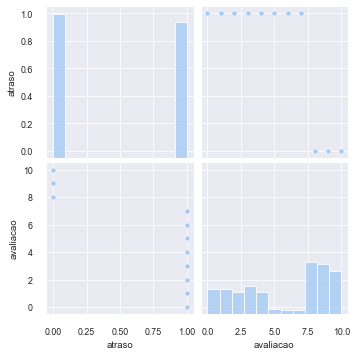

In [31]:
# 9. As avaliações dos pedidos podem ser explicadas pela variável atraso?

sns.pairplot(df[['atraso','avaliacao']])

In [32]:
# Correlação entre as variáveis

df['avaliacao'].corr(df['atraso'])

-0.9213671408976012

<AxesSubplot:>

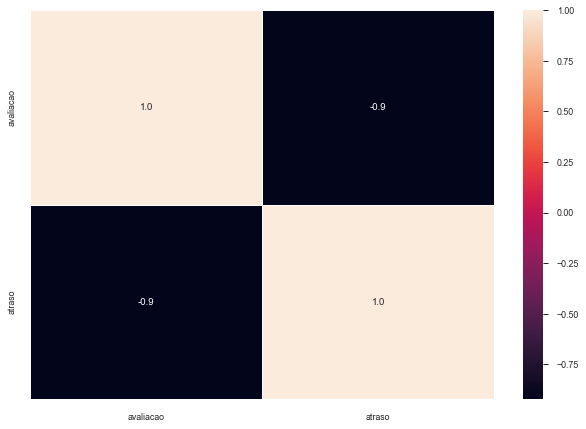

In [33]:
# Matriz de correlação entre Atraso e Avaliação - Mostra uma correlação negativa (Quando o Atraso cresce, a avaliação decresce)

sns.heatmap(df[['avaliacao','atraso']].corr(), annot = True, fmt=".1f", linewidths=.6)

# Atividade 4

In [ ]:
* Verifique a covariância entre as variáveis tempo de entrega real e avaliação;
* Verifique a correlação entre as variáveis;
* Apresente o gráfico de dispersão entre as duas variáveis.
* Respite o experimento anterior, mas, dessa vez, analise apenas as
avaliações com valores entre 8 e 10

In [35]:
list(df)

['Produto',
 'dia-da-semana',
 'hora-do-pedido',
 'tempo-entrega',
 'tempo-entrega-real',
 'data-pedido',
 'valor',
 'atraso',
 'avaliacao',
 'taxa_tempo_entrega']

In [37]:
df[['tempo-entrega-real','avaliacao']].corr()

,tempo-entrega-real,avaliacao
tempo-entrega-real,1.000000,-0.480397
avaliacao,-0.480397,1.000000


In [38]:
# Correlação
df['avaliacao'].corr(df['tempo-entrega-real'])

-0.48039683567790287

In [39]:
# Covariância
df[['tempo-entrega-real','avaliacao']].cov()

,tempo-entrega-real,avaliacao
tempo-entrega-real,2461.256197,-85.040054
avaliacao,-85.040054,12.731804


In [40]:
df['avaliacao'].cov(df['tempo-entrega-real'])

-85.04005421407425

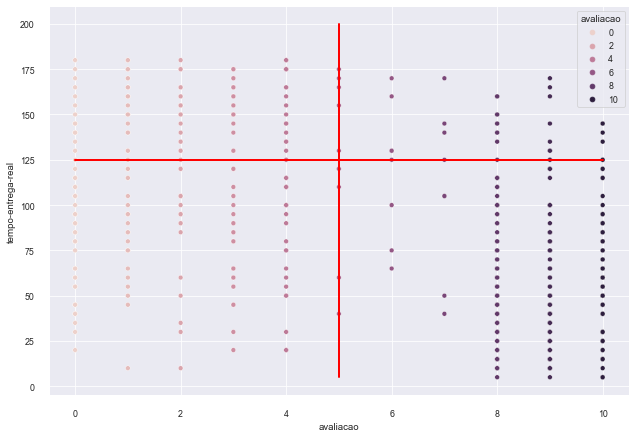

In [88]:
# Dispersão
sns.scatterplot(data = df, y = df['tempo-entrega-real'], x = df['avaliacao'], hue = df['avaliacao'] )
plt.plot([5,5],[5,200], linewidth=2, color='red')
plt.plot([0,10],[125,125], linewidth=2, color='red')



In [58]:
df['tempo-entrega-real'].groupby(df['avaliacao']).count()

avaliacao
0.0     48
1.0     47
2.0     42
3.0     53
4.0     41
5.0     10
6.0      8
7.0      8
8.0     98
9.0     94
10.0    81
Name: tempo-entrega-real, dtype: int64

# Análise do tempo de entrega com avaliação entre 8 e 10

In [63]:
# Análise do tempo de entrega com avaliação entre 8 e 10
df1 = df.loc[df['avaliacao'] > 7]
df1

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao,taxa_tempo_entrega
0,A,4.0,14.0,15.0,15.0,12/24/2020,39.0,0.0,10.0,0.00
2,B,7.0,14.0,30.0,30.0,12/27/2020,30.0,0.0,9.0,0.00
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0,-66.67
5,B,6.0,11.0,30.0,30.0,12/2/2020,44.0,0.0,8.0,0.00
6,B,1.0,11.0,75.0,15.0,12/2/2020,24.0,0.0,8.0,-80.00
...,...,...,...,...,...,...,...,...,...,...
521,H,2.0,18.0,180.0,85.0,12/23/2020,93.0,0.0,9.0,-52.78
522,D,1.0,19.0,85.0,10.0,12/26/2020,10.0,0.0,9.0,-88.24
523,A,1.0,9.0,70.0,35.0,12/24/2020,20.0,0.0,9.0,-50.00
524,B,6.0,15.0,145.0,60.0,12/22/2020,13.0,0.0,8.0,-58.62


In [64]:
df1[['tempo-entrega-real','avaliacao']]

,tempo-entrega-real,avaliacao
0,15.0,10.0
2,30.0,9.0
3,15.0,8.0
5,30.0,8.0
6,15.0,8.0
...,...,...
521,85.0,9.0
522,10.0,9.0
523,35.0,9.0
524,60.0,8.0


In [65]:
df1[['tempo-entrega-real','avaliacao']].corr()

,tempo-entrega-real,avaliacao
tempo-entrega-real,1.000000,-0.028222
avaliacao,-0.028222,1.000000


In [66]:
df1['avaliacao'].corr(df['tempo-entrega-real'])

-0.028221983860558904

In [67]:
df1[['tempo-entrega-real','avaliacao']].cov()

,tempo-entrega-real,avaliacao
tempo-entrega-real,1558.478103,-0.901139
avaliacao,-0.901139,0.654196


In [68]:
df1['avaliacao'].cov(df['tempo-entrega-real'])

-0.9011393018745963

<AxesSubplot:xlabel='avaliacao', ylabel='tempo-entrega-real'>

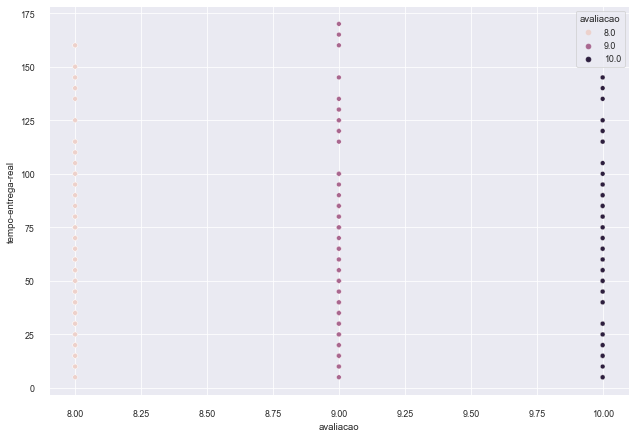

In [69]:
sns.scatterplot(data = df1, y = df1['tempo-entrega-real'], x = df1['avaliacao'], hue = df1['avaliacao'] )

# Feature Engineering - Diferença entre Tempo de Entrega e Tempo Previsto

In [ ]:
* Crie uma nova coluna de dados representando a diferença entre o tempo real de entrega e o tempo previsto;
• Filtre apenas os registros em que houve atraso;
• Verifique a variância e a correlação entre a nova variável e a avaliação do
pedido.

In [72]:
df['dif_tempo'] = df['tempo-entrega-real'] - df['tempo-entrega']

In [73]:
df

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao,taxa_tempo_entrega,dif_tempo
0,A,4.0,14.0,15.0,15.0,12/24/2020,39.0,0.0,10.0,0.00,0.0
1,A,7.0,13.0,15.0,60.0,12/16/2020,10.0,1.0,0.0,300.00,45.0
2,B,7.0,14.0,30.0,30.0,12/27/2020,30.0,0.0,9.0,0.00,0.0
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0,-66.67,-30.0
4,B,6.0,13.0,60.0,75.0,12/18/2020,23.0,1.0,1.0,25.00,15.0
...,...,...,...,...,...,...,...,...,...,...,...
525,G,5.0,21.0,50.0,130.0,12/23/2020,25.0,1.0,0.0,160.00,80.0
526,B,2.0,7.0,165.0,160.0,12/24/2020,97.0,0.0,8.0,-3.03,-5.0
527,F,1.0,5.0,35.0,60.0,12/8/2020,22.0,1.0,3.0,71.43,25.0
528,H,6.0,14.0,90.0,110.0,12/23/2020,72.0,1.0,0.0,22.22,20.0


In [74]:
df2 = df.loc[df['dif_tempo'] < 0]

,Produto,dia-da-semana,hora-do-pedido,tempo-entrega,tempo-entrega-real,data-pedido,valor,atraso,avaliacao,taxa_tempo_entrega,dif_tempo
3,A,3.0,13.0,45.0,15.0,12/17/2020,44.0,0.0,8.0,-66.67,-30.0
6,B,1.0,11.0,75.0,15.0,12/2/2020,24.0,0.0,8.0,-80.00,-60.0
10,C,2.0,13.0,30.0,15.0,12/30/2020,19.0,0.0,10.0,-50.00,-15.0
16,A,4.0,11.0,90.0,60.0,12/12/2020,28.0,0.0,10.0,-33.33,-30.0
18,E,5.0,11.0,75.0,15.0,12/10/2020,28.0,0.0,10.0,-80.00,-60.0
...,...,...,...,...,...,...,...,...,...,...,...
521,H,2.0,18.0,180.0,85.0,12/23/2020,93.0,0.0,9.0,-52.78,-95.0
522,D,1.0,19.0,85.0,10.0,12/26/2020,10.0,0.0,9.0,-88.24,-75.0
523,A,1.0,9.0,70.0,35.0,12/24/2020,20.0,0.0,9.0,-50.00,-35.0
524,B,6.0,15.0,145.0,60.0,12/22/2020,13.0,0.0,8.0,-58.62,-85.0


In [75]:
df2 = df.loc[df['dif_tempo'] < 0]

In [79]:
df2[['dif_tempo', 'avaliacao']].corr()

,dif_tempo,avaliacao
dif_tempo,1.000000,0.002923
avaliacao,0.002923,1.000000


In [80]:
df2['avaliacao'].corr(df['dif_tempo'])

0.0029228152198506924

In [84]:
df2[['dif_tempo', 'avaliacao']].cov()

,dif_tempo,avaliacao
dif_tempo,1606.917671,0.095181
avaliacao,0.095181,0.659936


In [85]:
df2['avaliacao'].cov(df['dif_tempo'])

0.09518072289156516

<AxesSubplot:>

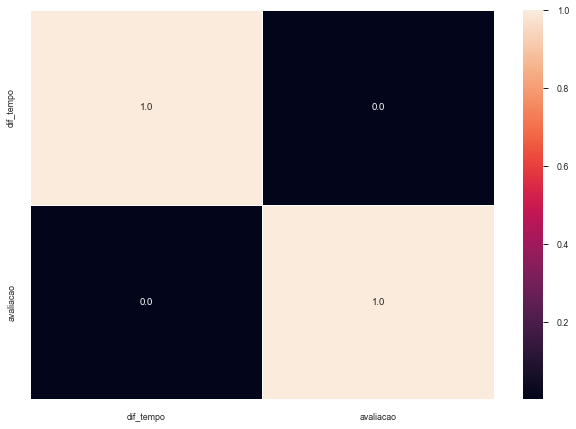

In [87]:
sns.heatmap(df2[['dif_tempo', 'avaliacao']].corr(), annot = True, fmt=".1f", linewidths=.6)